# A simply example to do curvefit by using lmfit 
-- Yugang Zhang@CHX beamline

In [1]:
%matplotlib notebook

In [2]:
from lmfit.models import LinearModel, LorentzianModel
import numpy as np
import matplotlib.pyplot as plt


## A dataset

In [3]:
x= np.array([0.00256254, 0.0026291 , 0.00269565, 0.00276221, 0.00282876,
       0.00289532, 0.00296187, 0.00302843, 0.00309498, 0.00316154,
       0.00322809, 0.00329465, 0.0033612 , 0.00342776, 0.00349431,
       0.00356087])

y = np.array([0.51837127, 0.63801091, 0.76866015, 0.92428627, 1.08699211,
       1.26149843, 1.42400941, 1.54300416, 1.59157737, 1.51203988,
       1.33276806, 1.14017287, 0.98358786, 0.88768674, 0.82163376,
       0.80195608])

## Create a model: Lorentzian + line

In [4]:
peak = LorentzianModel()
background = LinearModel()
model = peak + background

### Setup guess values and limit

In [5]:
model.set_param_hint('slope', value=5   )
model.set_param_hint('intercept', value=0   )
model.set_param_hint('center', value=0.003,   )
model.set_param_hint('amplitude', value= 0.1,   )
model.set_param_hint('sigma', value=0.0003, min=0  )

## Do fit

In [6]:
out=model.fit(y, x=x, method='nelder')

## Check fit result

In [7]:
out.best_values

{'intercept': 8.9595705759721e-05,
 'slope': 10.600947918066176,
 'sigma': 0.00038810250365384213,
 'center': 0.0030860663362549364,
 'amplitude': 0.0018547199281531248}

In [8]:
print( out.fit_report() )

[[Model]]
    (Model(lorentzian) + Model(linear))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 410
    # data points      = 16
    # variables        = 5
    chi-square         = 0.04523155
    reduced chi-square = 0.00411196
    Akaike info crit   = -83.8967878
    Bayesian info crit = -80.0338442
[[Variables]]
    sigma:      3.8810e-04 (init = 0.0003)
    center:     0.00308607 (init = 0.003)
    amplitude:  0.00185472 (init = 0.1)
    intercept:  8.9596e-05 (init = 0)
    slope:      10.6009479 (init = 5)
    fwhm:       7.7621e-04 == '2.0000000*sigma'
    height:     1.52118502 == '0.3183099*amplitude/max(1.e-15, sigma)'



<IPython.core.display.Javascript object>


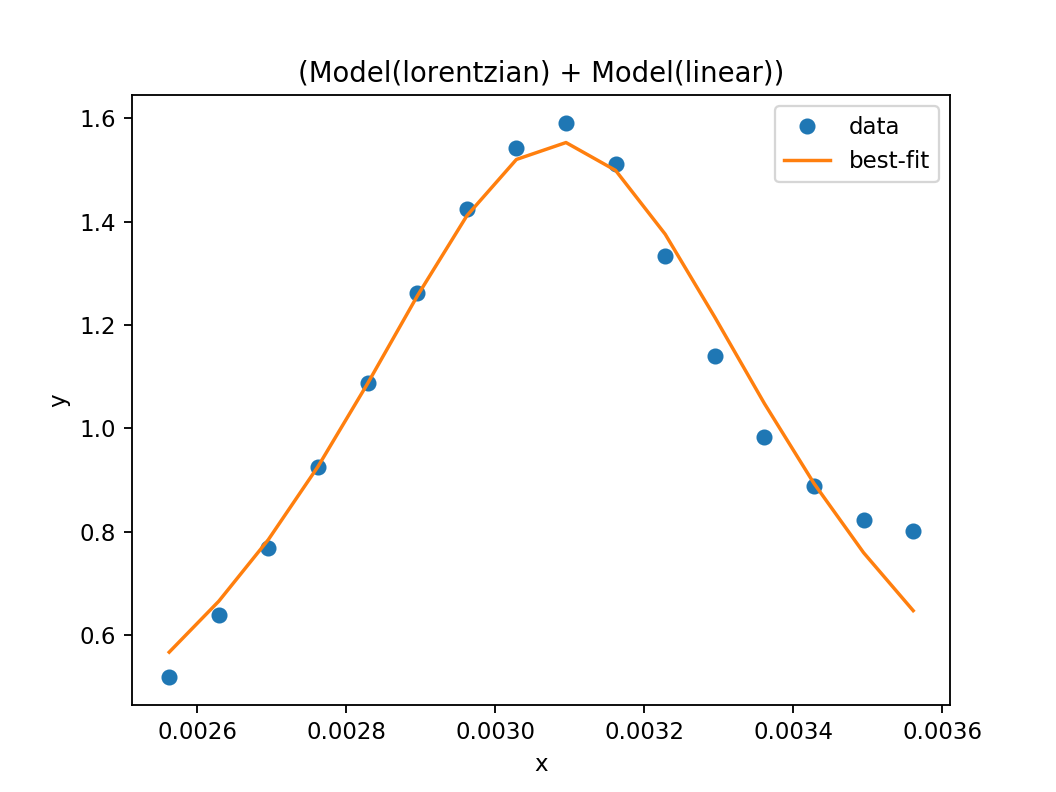

In [9]:
fig, ax = plt.subplots( )
out.plot_fit()

<IPython.core.display.Javascript object>


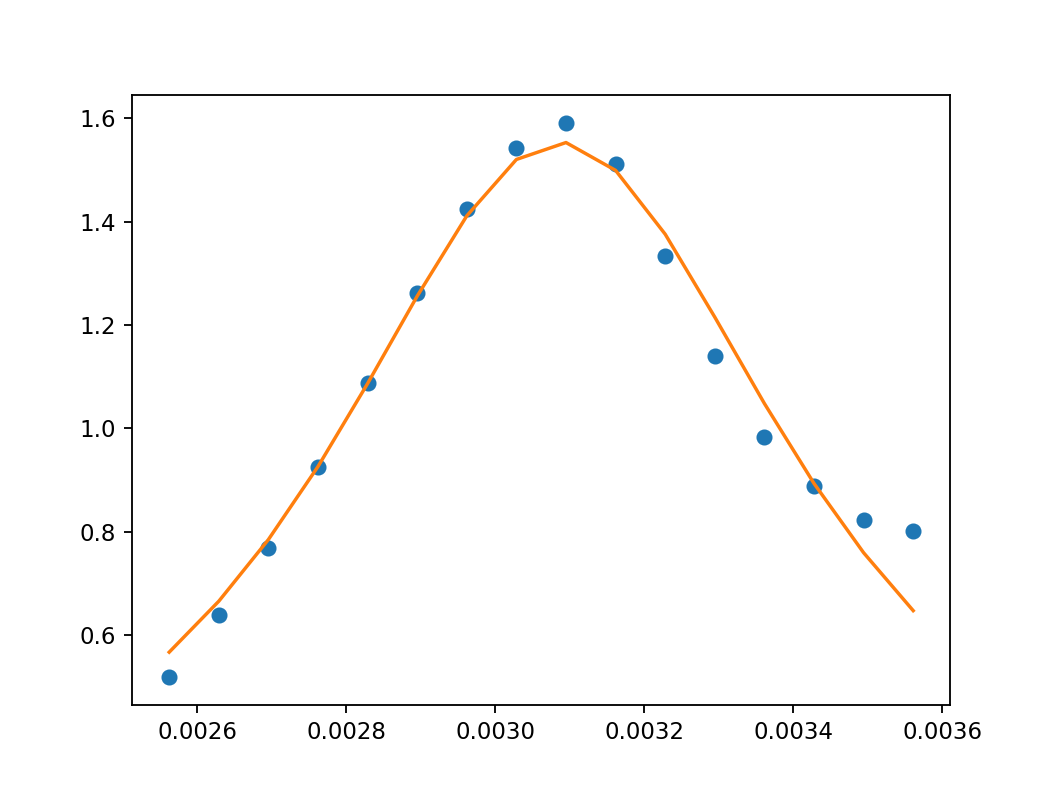

In [10]:
fig, ax = plt.subplots( )
yf=out.model.eval(params=out.params, x=x)
ax.plot(x,y, marker='o', linestyle='')
ax.plot(x,yf, marker='', linestyle='-')


